# Clustering - KMEANS
* Simple code for kmeans Clustering 
* Supporting graphs for cluster size selection
* dataset: iris

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

# Creating 20 random initial centroids
kmeans = KMeans(n_clusters=20, init='random', n_init=1, max_iter=1, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=None, copy_x=True, 
                n_jobs=None, algorithm='auto')

kmeans.fit(x)


init_centroids = kmeans.cluster_centers_

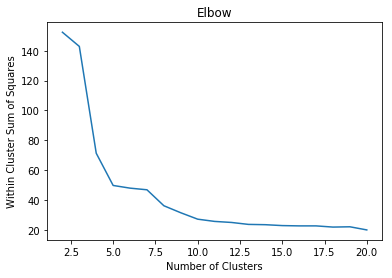

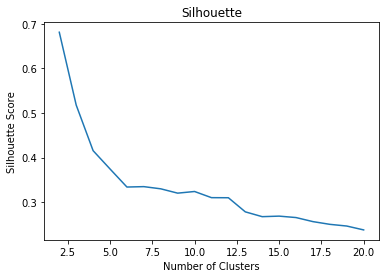

In [3]:
k_values = range(2,21)

first=True

for k in k_values:
    kmeans = KMeans(n_clusters=k, init=init_centroids[0:k,:], n_init=1, max_iter=10, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=42, copy_x=True, 
                n_jobs=None, algorithm='auto')
    cluster_labels = kmeans.fit_predict(x)
    score_wss = round(kmeans.inertia_ ,1)
    silhouette = round(silhouette_score(x, cluster_labels),4)
    aux_results = {'score_wss': score_wss, 'silhouette': silhouette}
    aux_results = pd.DataFrame(aux_results, index = [k])
    if first == True:
        final_results = aux_results
        first = False
    else:
        final_results = pd.concat([final_results, aux_results],axis =0)
        
plt.plot(final_results.index,final_results.score_wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow')
plt.show()

plt.plot(final_results.index,final_results.silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

In [4]:
print(final_results)

    score_wss  silhouette
2       152.4      0.6808
3       142.9      0.5176
4        71.3      0.4154
5        49.7      0.3744
6        47.9      0.3339
7        46.8      0.3348
8        36.1      0.3299
9        31.4      0.3202
10       27.1      0.3239
11       25.6      0.3101
12       24.9      0.3099
13       23.6      0.2783
14       23.4      0.2675
15       22.8      0.2687
16       22.6      0.2655
17       22.6      0.2564
18       21.8      0.2503
19       22.0      0.2465
20       19.9      0.2378
